In [19]:
%matplotlib inline


# Faces dataset decompositions


This example applies to `olivetti_faces` different unsupervised
matrix decomposition (dimension reduction) methods from the module
:py:mod:`sklearn.decomposition` (see the documentation chapter
`decompositions`) .




In [15]:
print(__doc__)

# Authors: Vlad Niculae, Alexandre Gramfort
# License: BSD 3 clause

import logging
from time import time
from os import listdir
from numpy.random import RandomState
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import MiniBatchKMeans
from sklearn import decomposition
from copy import deepcopy
import cmocean as cm 
from sklearn.decomposition import PCA, FastICA

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')
n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (550, 1500)
rng = RandomState(0)

# #############################################################################

Automatically created module for IPython interactive environment


In [35]:
flag = True
# directory = '/home/nilavro/data/f03/2017-12-08/1512681434856'
# directory = '/home/nilavro/data/f03/2017-12-15/1513304232411'
# directory = '/home/nilavro/data/f03/2017-12-17/1513361832444'
# directory = '/home/nilavro/data/f03/2017-12-18/1513549032246'

# directory = '/home/nilavro/data/f03/2017-12-19/1513664059443'
directory = '/home/nilavro/data/f03/2017-12-19/1513685832345'

startX = 0
stopX = 550
startY = 1500
stopY = 3000
for dir in sorted(listdir(directory)):
    print(dir)
    temps  = np.loadtxt(directory +  '/' + dir  +'/stitched/stitchedtemps_0.txt', dtype = np.float64, delimiter=',')
    temps = temps[startX:stopX,startY:stopY]
    
    # temps = cv2.resize(temps,None,fx=0.09, fy=0.03, interpolation = cv2.INTER_CUBIC)
    if flag:
        flag = False
        (row,col) = temps.shape
        
        Temps = np.empty((0,row*col), np.float64)
    Temps = np.vstack( (Temps, np.reshape(temps,(row*col))))

1513690202696
1513690503284
1513690802634
1513691103311
1513691403026
1513691702591
1513692002822
1513692302894
1513692602931
1513692903374
1513693202837
1513693503368
1513693803154
1513694102606
1513694402718
1513694703162
1513695002996
1513695302978
1513695602907
1513695902857
1513696203403
1513696502849
1513696803248
1513697103152
1513697403058
1513697702615
1513698003420
1513698302713
1513698603459
1513698902650
1513699202636
1513699502836
1513699802692
1513700102738
1513700403510
1513700703190
1513701002595
1513701303455
1513701602775
1513701903552
1513702202547
1513702503002
1513702802679
1513703102734
1513703403354
1513703703299
1513704002737
1513704302962
1513704603493
1513704902762
1513705202609
1513705502592
1513705803469
1513706102982
1513706402751
1513706703071
1513707002693
1513707302606
1513707603348
1513707902987
1513708203308
1513708502564
1513708803537
1513709103265
1513709402737
1513709702745
1513710002697
1513710303190
1513710603342
1513710902840
1513711202893
151371

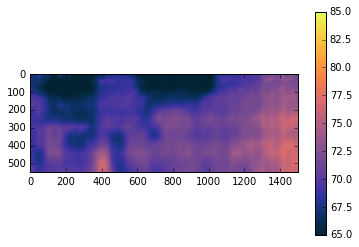

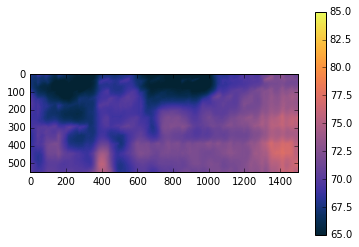

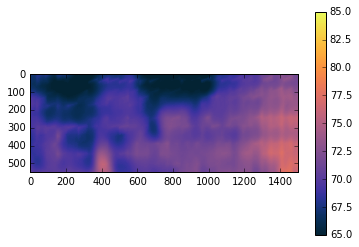

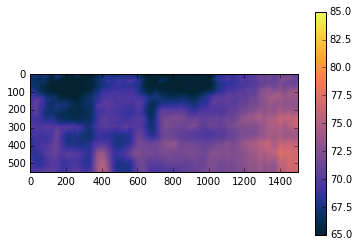

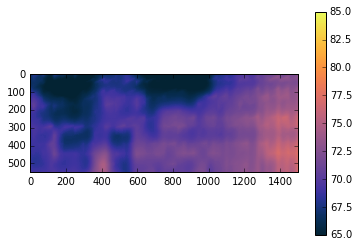

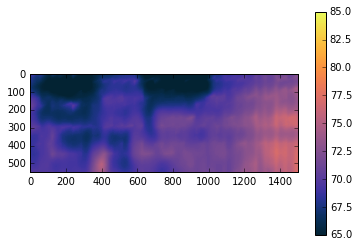

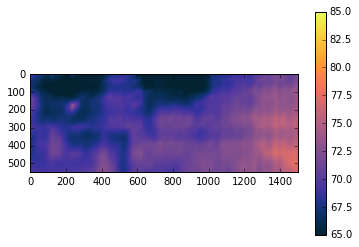

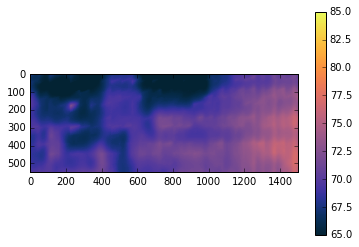

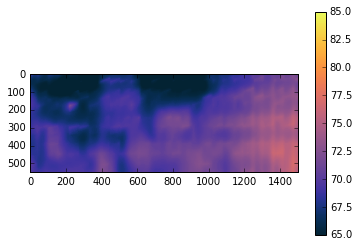

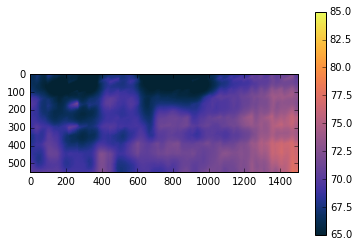

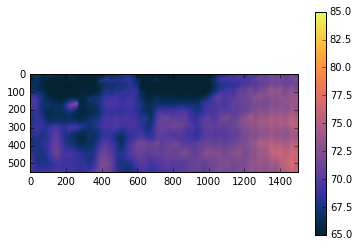

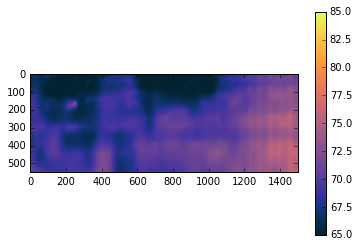

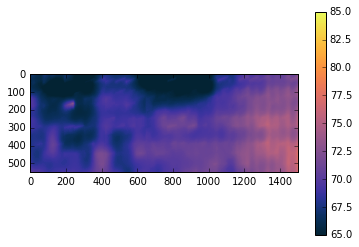

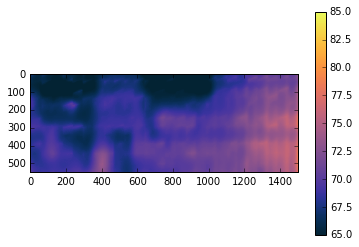

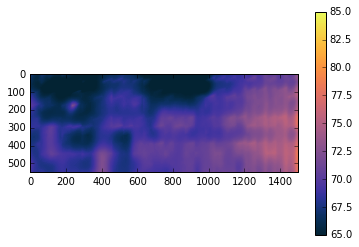

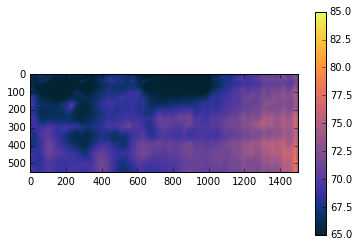

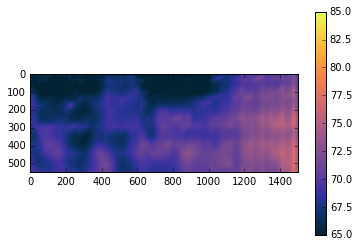

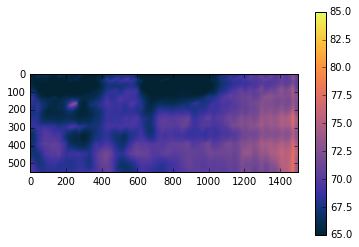

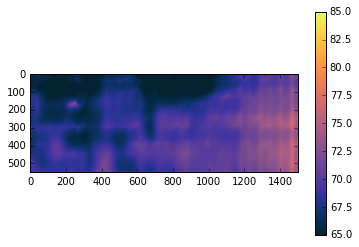

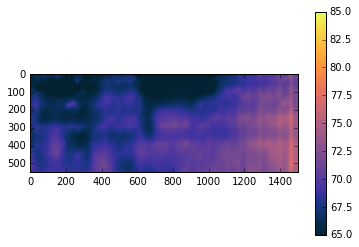

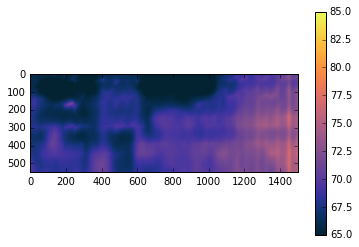

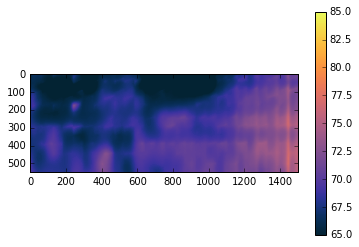

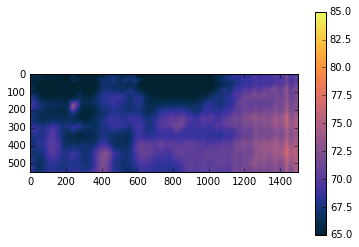

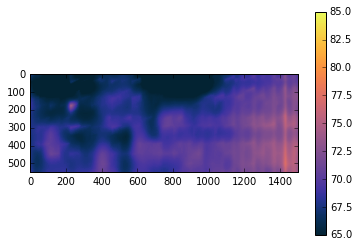

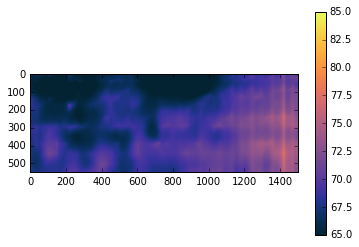

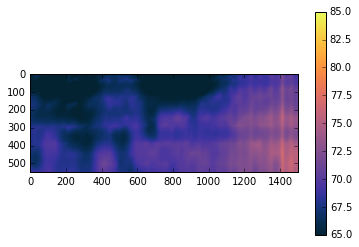

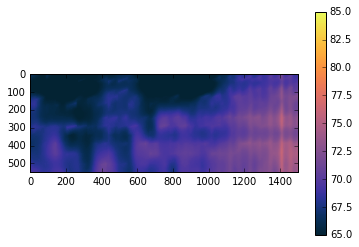

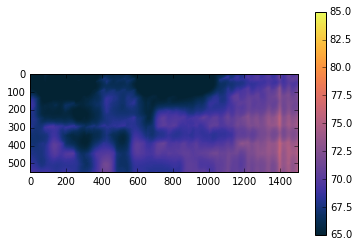

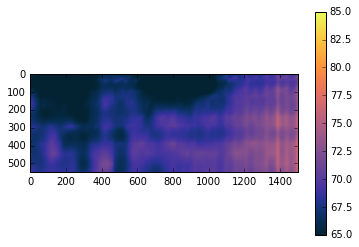

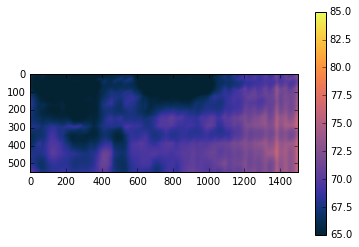

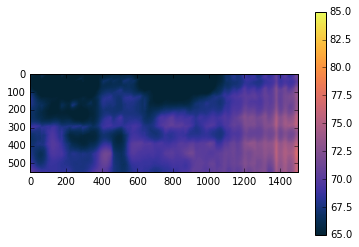

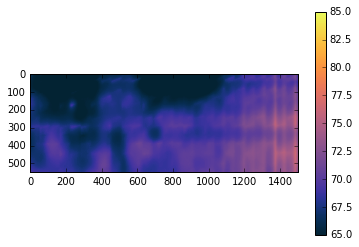

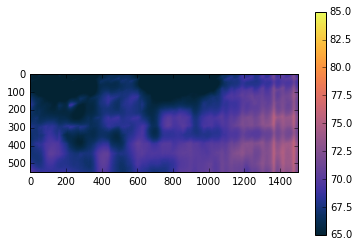

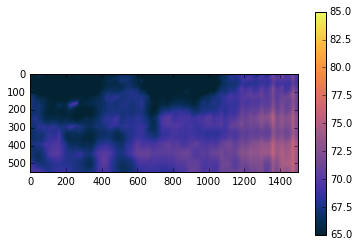

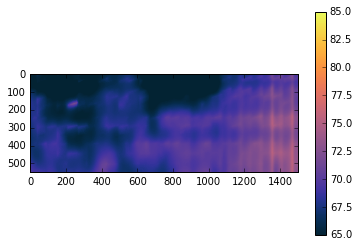

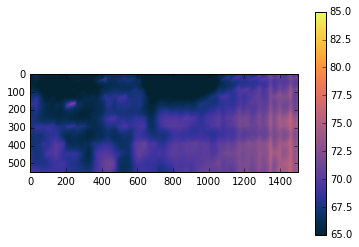

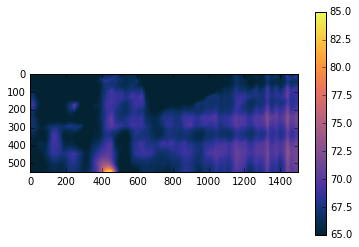

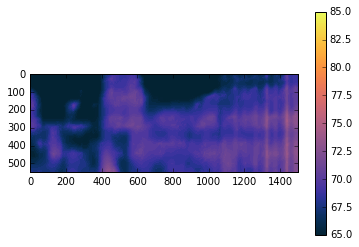

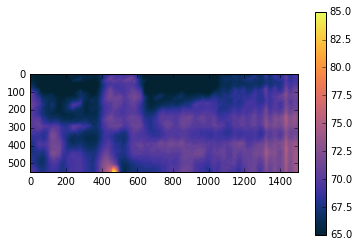

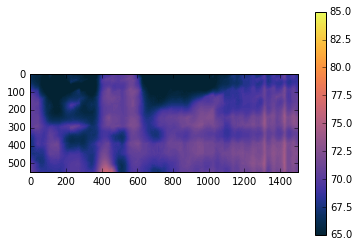

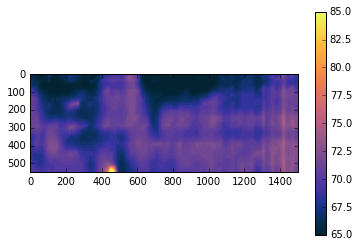

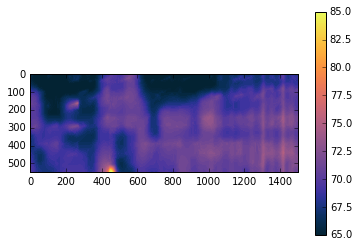

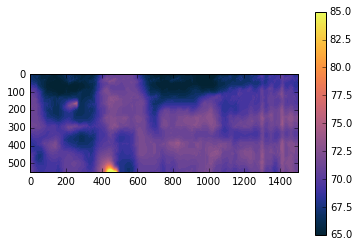

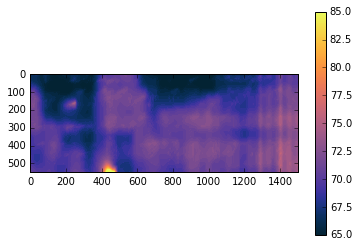

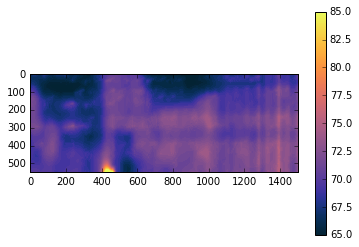

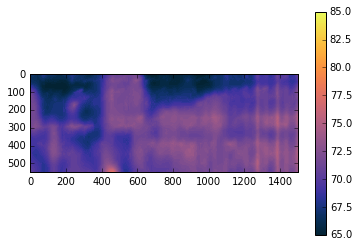

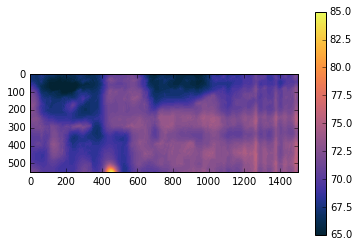

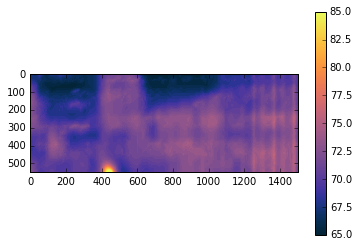

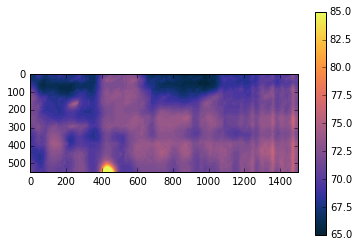

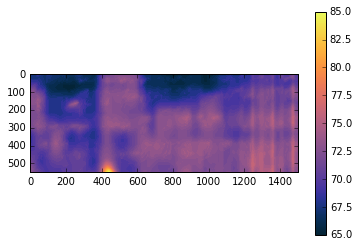

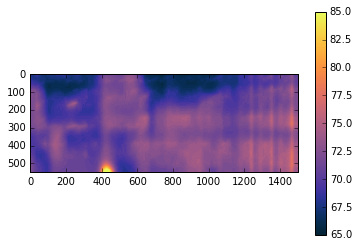

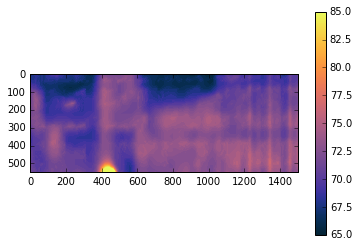

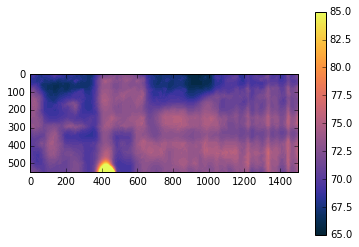

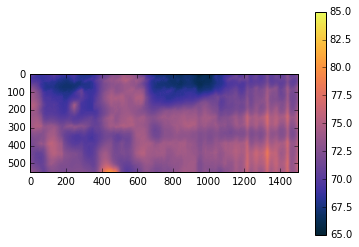

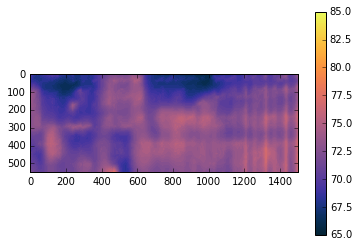

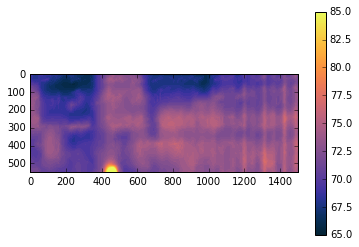

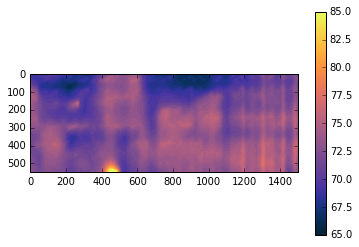

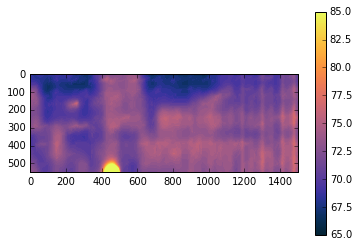

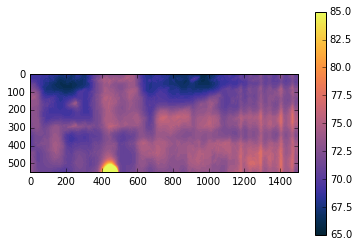

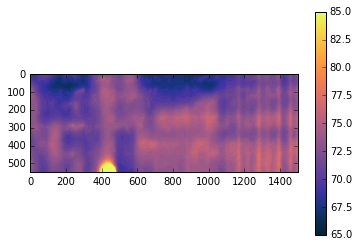

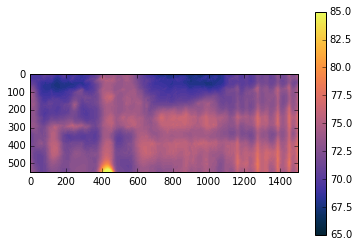

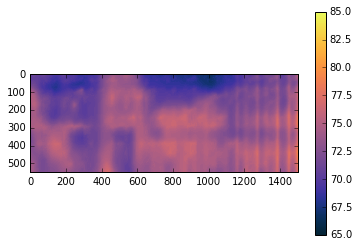

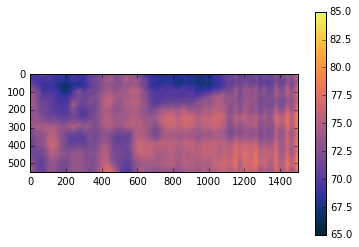

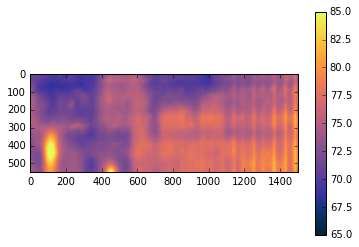

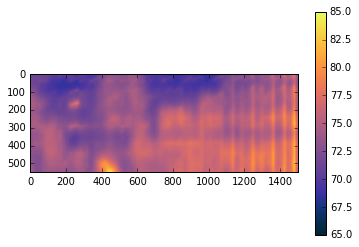

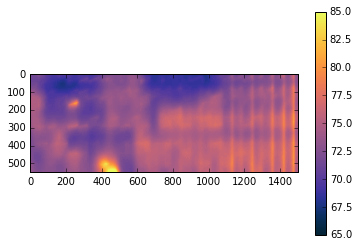

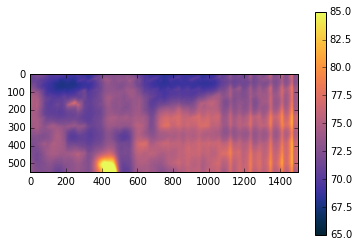

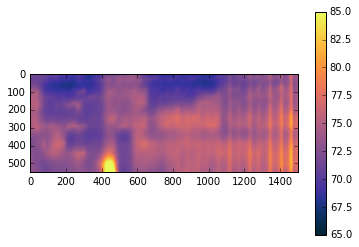

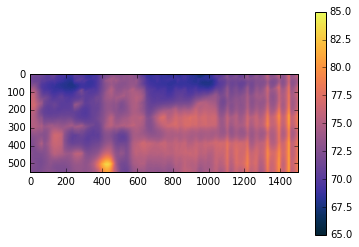

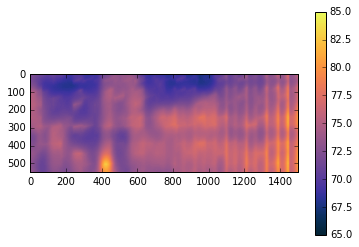

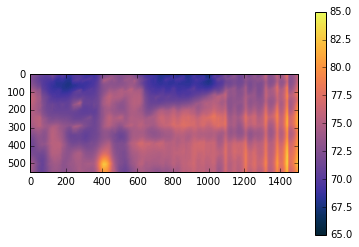

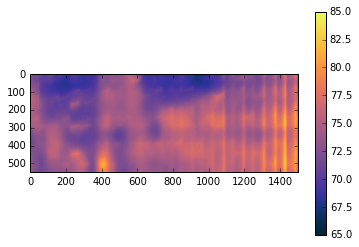

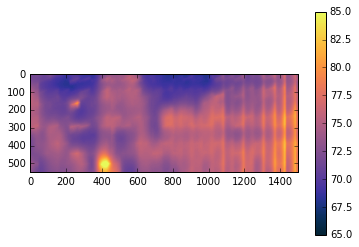

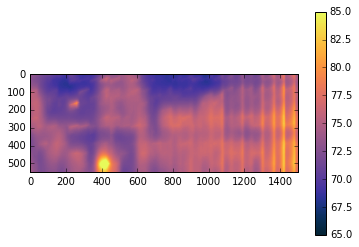

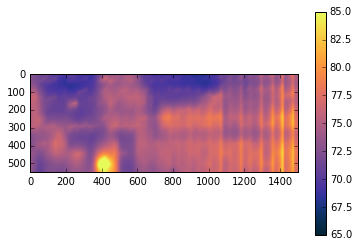

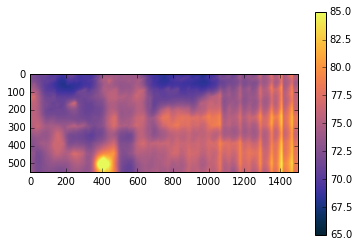

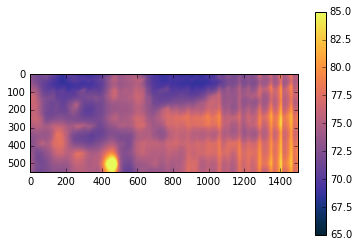

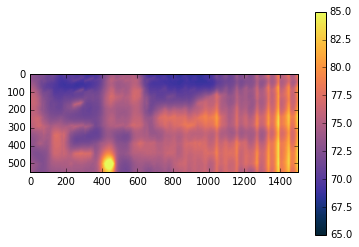

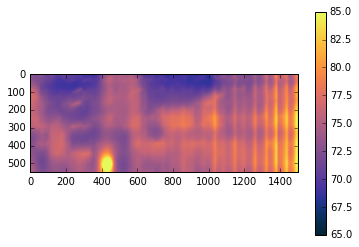

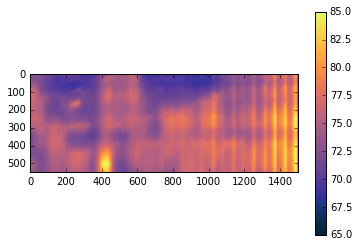

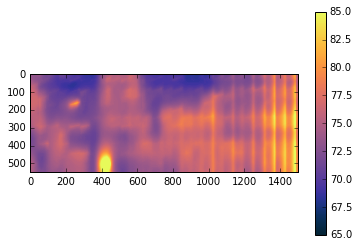

In [3]:
numbers = len(Temps)
from cmocean import cm

for i in range(0,len(Temps)):
    image = Temps[i] 
    
    # image[image < 70] = 0
    
    plt.imshow(image.reshape(row,col), cmap = cm.thermal, vmin = 65, vmax = 85)
    plt.colorbar()
    plt.show()

In [33]:
# Load faces data
 
faces = deepcopy(Temps)

n_samples, n_features = faces.shape

# global centering
faces_centered = faces - faces.mean(axis=0)

# local centering
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

print("Dataset consists of %d faces" % n_samples)

Dataset consists of 81 faces


In [34]:
faces_centered.shape

(81, 825000)

In [8]:
def plot_gallery(title, images, n_col=n_col, n_row=n_row):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

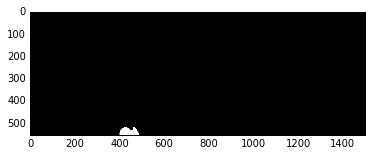

In [25]:
from copy import deepcopy
import matplotlib
import cv2 

n_components = 5

estimator = PCA(n_components = n_components, whiten=True).fit(  faces_centered  ) # Reconstruct signals
S_ = estimator.components_



merged =  np.abs(deepcopy(S_[0,:].reshape(row, col)))

for i in range(1,n_components):
    merged = merged + np.abs(deepcopy(S_[i,:].reshape(row, col)))
    

my_cm = matplotlib.cm.get_cmap('gray')

normed_data = (merged - np.min(merged)) / (np.max(merged) - np.min(merged))
mapped_data = my_cm(normed_data)

mapped_data = my_cm(normed_data, bytes=True)
mapped_data = mapped_data[:,:,0]

ret3,th3 = cv2.threshold(mapped_data,50,255,cv2.THRESH_BINARY)
plt.imshow(th3 , cmap = 'gray')

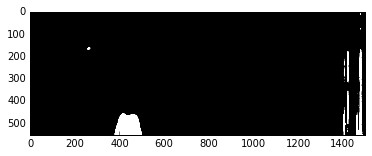

In [31]:
ret3,th3 = cv2.threshold(mapped_data,40,255,cv2.THRESH_BINARY)
plt.imshow(th3 , cmap = 'gray')